In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from model_utils import *

In [3]:
train_X = np.loadtxt('train_x.csv', delimiter = ',')
train_Y = np.loadtxt('train_y.csv', delimiter = ',').reshape(1, train_X.shape[1])

test_X = np.loadtxt('test_x.csv', delimiter = ',')
test_Y = np.loadtxt('test_y.csv', delimiter = ',').reshape(1, test_X.shape[1])

In [4]:
print("Shape of train_X : ", train_X.shape)
print("Shape of train_Y : ", train_Y.shape)
print("Shape of test_X : ", test_X.shape)
print("Shape of test_Y : ", test_Y.shape)

Shape of train_X :  (2, 211)
Shape of train_Y :  (1, 211)
Shape of test_X :  (2, 200)
Shape of test_Y :  (1, 200)


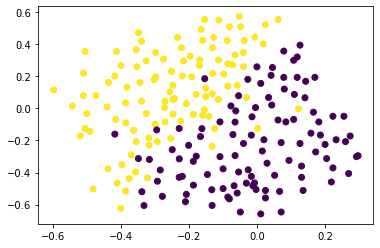

In [11]:
plt.scatter(train_X[0], train_X[1], c=train_Y[0])
plt.show()

# Model without Regularization

- Model layers like forward_propagation, cost_function, backward_propagation, update_parameters are imported from model_utils

In [4]:
def model(X, Y, layers_dims, learning_rate = 0.3, num_iterations = 30000):

    grads = {}
    cost_list = []                            
    m = X.shape[1]                        
    
    parameters = initialize_parameters(layers_dims)

    for i in range(0, num_iterations):

        a3, cache = forward_propagation(X, parameters)
    
        cost = cost_function(a3, Y)

        grads = backward_propagation(X, Y, cache)
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if (i%1000 == 0):
            print("Cost after iteration ", i, " is : ", cost)
            cost_list.append(cost)
    
    # plot the cost
    plt.plot(cost_list)
    plt.ylabel('cost')
    plt.xlabel('iterations')
    plt.show()
    
    return parameters

Cost after iteration 0: 0.695492074816334
Cost after iteration 10000: 0.10185215781779576
Cost after iteration 20000: nan


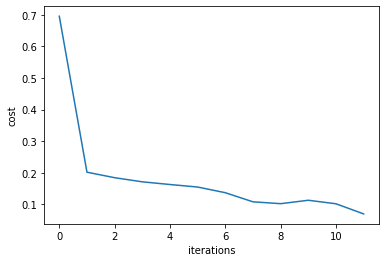

In [46]:
learning_rate = 0.3
num_iterations = 20000 + 1
layers_dims = [train_X.shape[0], 100, 10, 1]
parameters = model(train_X, train_Y, layers_dims, learning_rate, num_iterations)

Accuracy of the model on Train dataset is :  98.58 %
Accuracy of the model on Test dataset is :  93.5 %


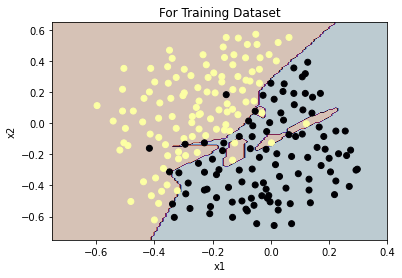

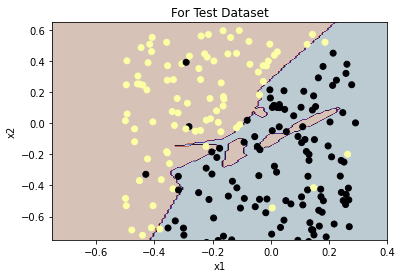

In [47]:
accuracy(train_X, train_Y, parameters, "Train")
accuracy(test_X, test_Y, parameters, "Test")

plt.title("For Training Dataset")
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

plt.title("For Test Dataset")
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), test_X, test_Y)

# L2 Regularization

## Cost Function
Update the cost function with :

$Cost = Cost + \frac{\lambda}{2m} * \sum^{L}_{l=1}\sum_{i=1}\sum_{j=1} | W^{[l]}_{ij} |^2$


## Backward Propagation
For every i in layers of neural network, update $dW_i$ with :

$dW_i = dW_i + \frac{\lambda}{m}*W_i$


In [10]:
def cost_function_with_L2(A3, Y, parameters, lambd):
    m = Y.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    
    cost = - 1./m * np.sum(Y*np.log(A3) + (1 - Y)*(np.log(1 - A3)))
    L2_regularization_cost =              
    
    cost = cost + L2_regularization_cost
    
    return cost

In [11]:
def backward_propagation_with_L2(X, Y, cache, lambd):
    
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    dW3 = 1./m * np.dot(dZ3, A2.T) +               # Your Code here
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T) +              # Your Code here
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T) +              # Your Code here
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,
                 "dA2": dA2, "dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dA1": dA1, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

# Model with L2 Regularization

In [ ]:
def model_with_L2(X, Y, layers_dims, learning_rate = 0.3, num_iterations = 30000, lambd = 0.7):

    grads = {}
    cost_list = []                            
    m = X.shape[1]                        
    
    parameters = initialize_parameters(layers_dims)

    for i in range(0, num_iterations):

        a3, cache = forward_propagation(X, parameters)
    
        cost =              # Your Code here

        grads =              # Your Code here
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if (i%1000 == 0):
            print("Cost after iteration ", i, " is : ", cost)
            cost_list.append(cost)

    
    
    # plot the cost
    plt.plot(cost_list)
    plt.ylabel('cost')
    plt.xlabel('iterations')
    plt.show()
    
    return parameters

**You can increase or decrease the value of lambd to see its effect**
- For lambd = 0, the effect will be same as without regularization

In [ ]:
learning_rate = 0.3
num_iterations = 20000 + 1
layers_dims = [train_X.shape[0], 100, 10, 1]

parameters = model_with_L2(train_X, train_Y, layers_dims, learning_rate, num_iterations, lambd = 0.7)

Run below cell to check the accuracy and plot the decision boundary

In [ ]:
accuracy(train_X, train_Y, parameters, "Train")
accuracy(test_X, test_Y, parameters, "Test")

plt.title("For Training Dataset")
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

plt.title("For Test Dataset")
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), test_X, test_Y)